In [1]:
using HarmonicBalance

# Natural equation for the parametron

In [2]:
@variables Ω, γ, λ, F, x, θ, η, α, ω, ψ, t, x(t)

natural_equation =  d(d(x,t),t) + γ*d(x,t) + Ω^2*(1-λ*cos(2*ω*t+ψ))*x + α*x^3 + η*d(x,t)*x^2
forces =  F*cos(ω*t+θ)
dEOM = HarmonicBalance.DifferentialEquation(natural_equation + forces, x)
HarmonicBalance.add_harmonic!(dEOM, x, ω);
#HarmonicBalance.add_harmonic!(dEOM, x, 3*ω)

In [9]:
@time harmonic_eqs = HarmonicBalance.get_harmonic_equations(dEOM)

109.037702 seconds (124.48 M allocations: 7.074 GiB, 2.25% gc time, 99.32% compilation time)


A set of 2 harmonic equations
Variables: u1(T), v1(T)
Parameters: α, ω, F, θ, γ, η, Ω, λ, ψ

Harmonic ansatz: 
x(t) = u1*cos(ωt) + v1*sin(ωt)

Harmonic equations:

F*cos(θ) + γ*Differential(T)(u1(T)) + (Ω^2)*u1(T) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^2)*u1(T) + (1//4)*η*ω*(v1(T)^3) + (3//4)*η*(u1(T)^2)*Differential(T)(u1(T)) + (1//4)*η*(v1(T)^2)*Differential(T)(u1(T)) + (1//4)*η*ω*(u1(T)^2)*v1(T) + (1//2)*η*u1(T)*v1(T)*Differential(T)(v1(T)) + (1//2)*λ*(Ω^2)*v1(T)*sin(ψ) - (ω^2)*u1(T) - (1//2)*λ*(Ω^2)*u1(T)*cos(ψ) ~ 0

(Ω^2)*v1(T) + γ*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^3) + (1//4)*η*(u1(T)^2)*Differential(T)(v1(T)) + (3//4)*α*(u1(T)^2)*v1(T) + (3//4)*η*(v1(T)^2)*Differential(T)(v1(T)) + (1//2)*λ*(Ω^2)*u1(T)*sin(ψ) + (1//2)*λ*(Ω^2)*v1(T)*cos(ψ) + (1//2)*η*u1(T)*v1(T)*Differential(T)(u1(T)) - F*sin(θ) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - (1//4)*η*ω*(u1(T)^3) - γ*ω*u1(T) - (1//4)*η*ω*(v1(T)^2)*u1(T) ~ 0


## sweep parameters

In [10]:
fixed_parameters = (Ω => 1.0,γ => 1E-2, λ => 5E-2, F => 1E-3,  α => 1.,  η=>0.3, θ => 0, ψ => 0)
sweep = ω => LinRange(0.9, 1.1, 100)
#sweep = (ω => LinRange(0.9, 1.1,15), λ => LinRange(0.0, 0.2, 10))

soln = HarmonicBalance.get_steady_states(harmonic_eqs, sweep, fixed_parameters, random_warmup=true, threading=false)
# HarmonicBalance.save("parametron_result.jld2", soln);

Tracking 9 paths... 100%|███████████████████████████████| Time: 0:00:12
  # paths tracked:                  9
  # non-singular solutions (real):  5 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         5 (0)


# making 1D plots

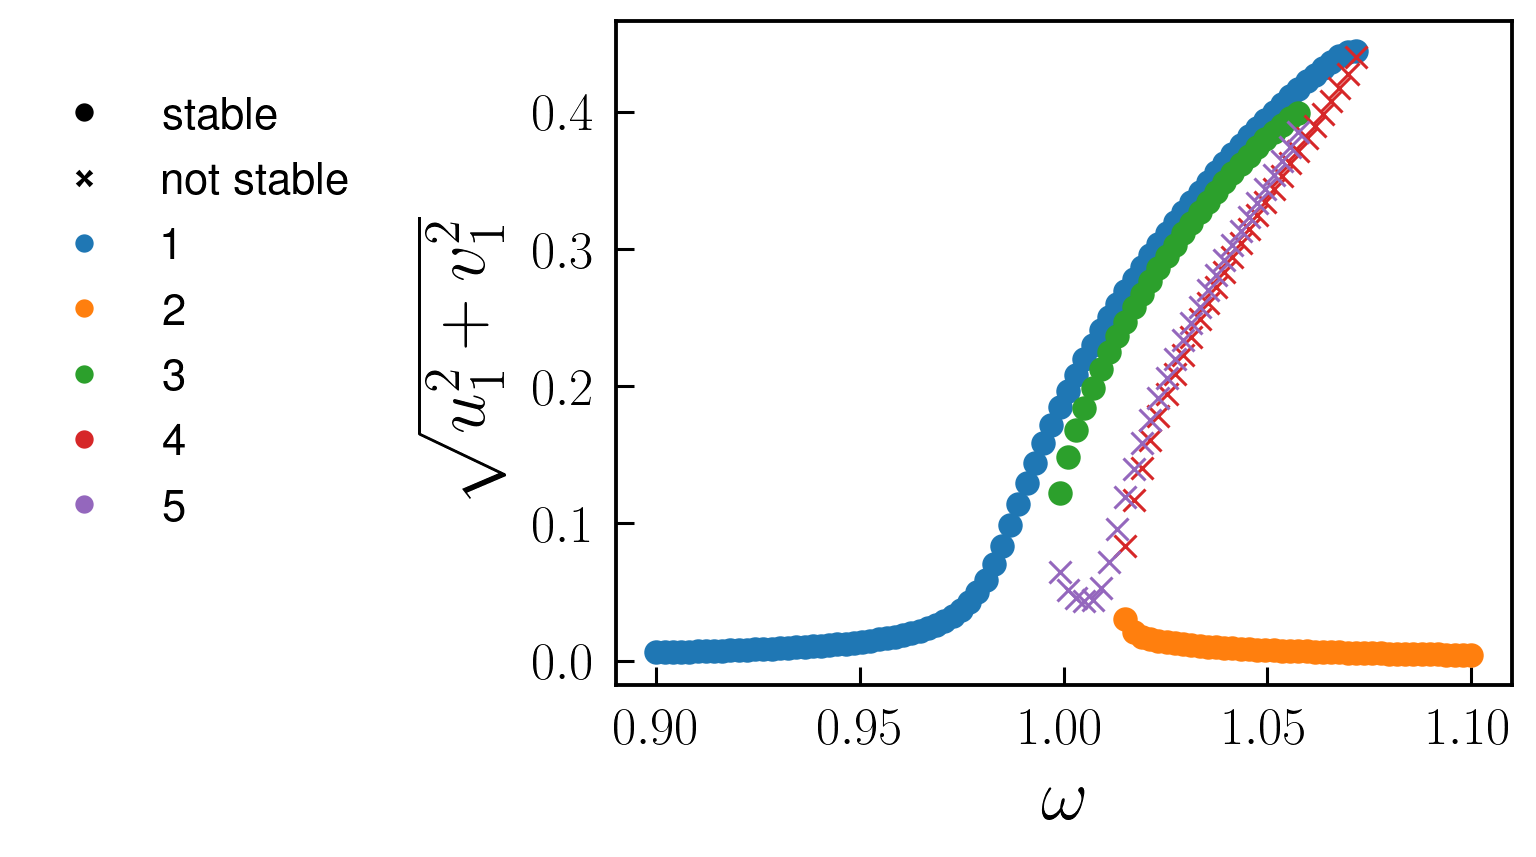

In [15]:
HarmonicBalance.plot_1D_solutions(soln, x="ω", y="sqrt(u1^2 + v1^2)", plot_only=["physical"], marker_classification="stable");

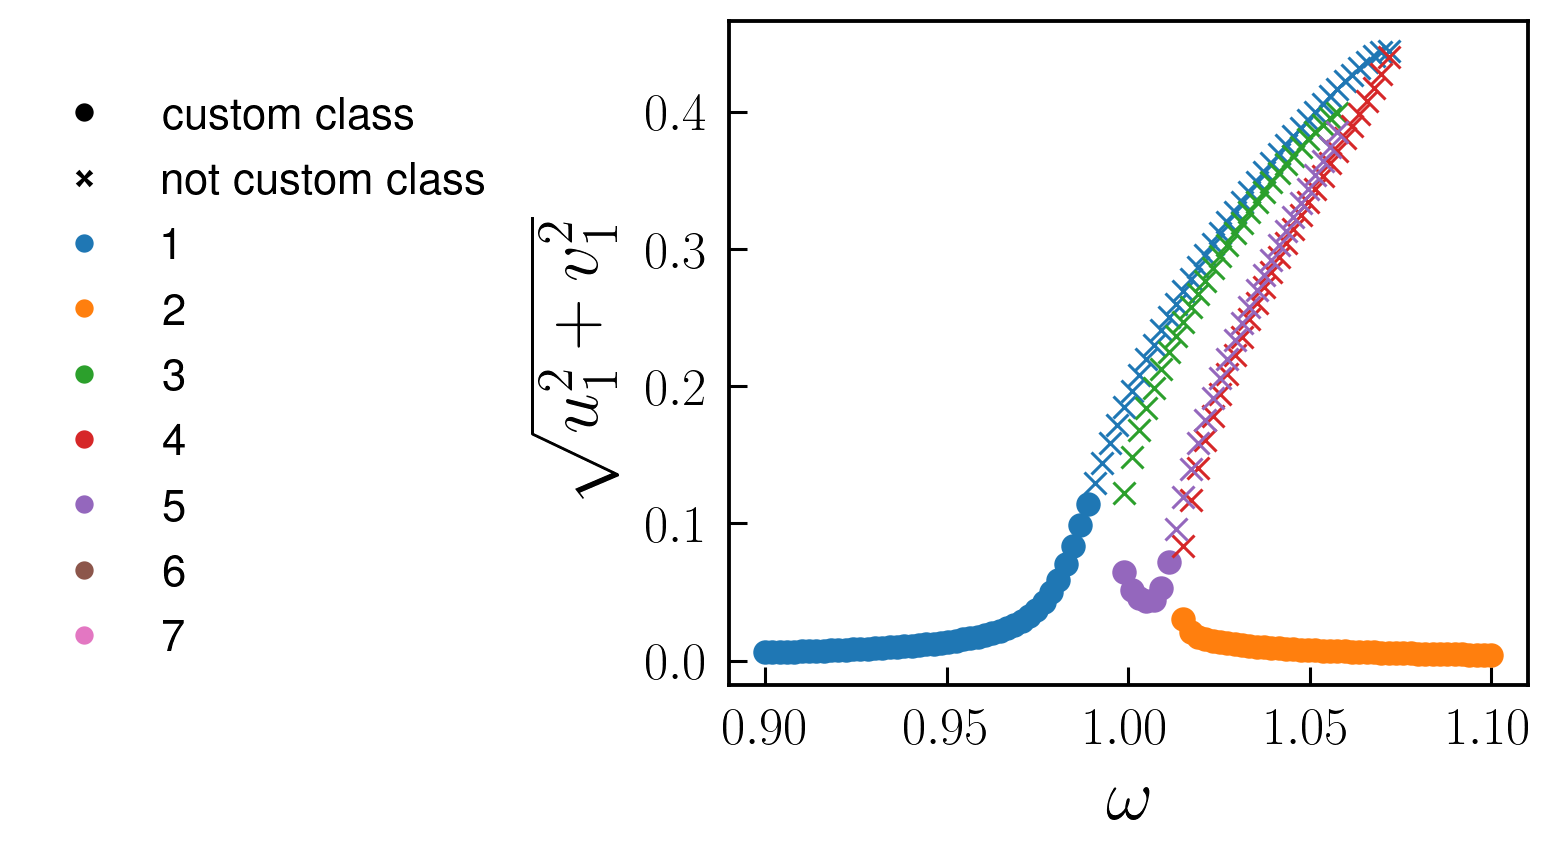

In [12]:
# user-allowed classification
plt = HarmonicBalance.plot_1D_solutions(soln, x="ω", y="sqrt(u1^2 + v1^2)", marker_classification="ω^15 * sqrt(u1^2 + v1^2) < 0.1");

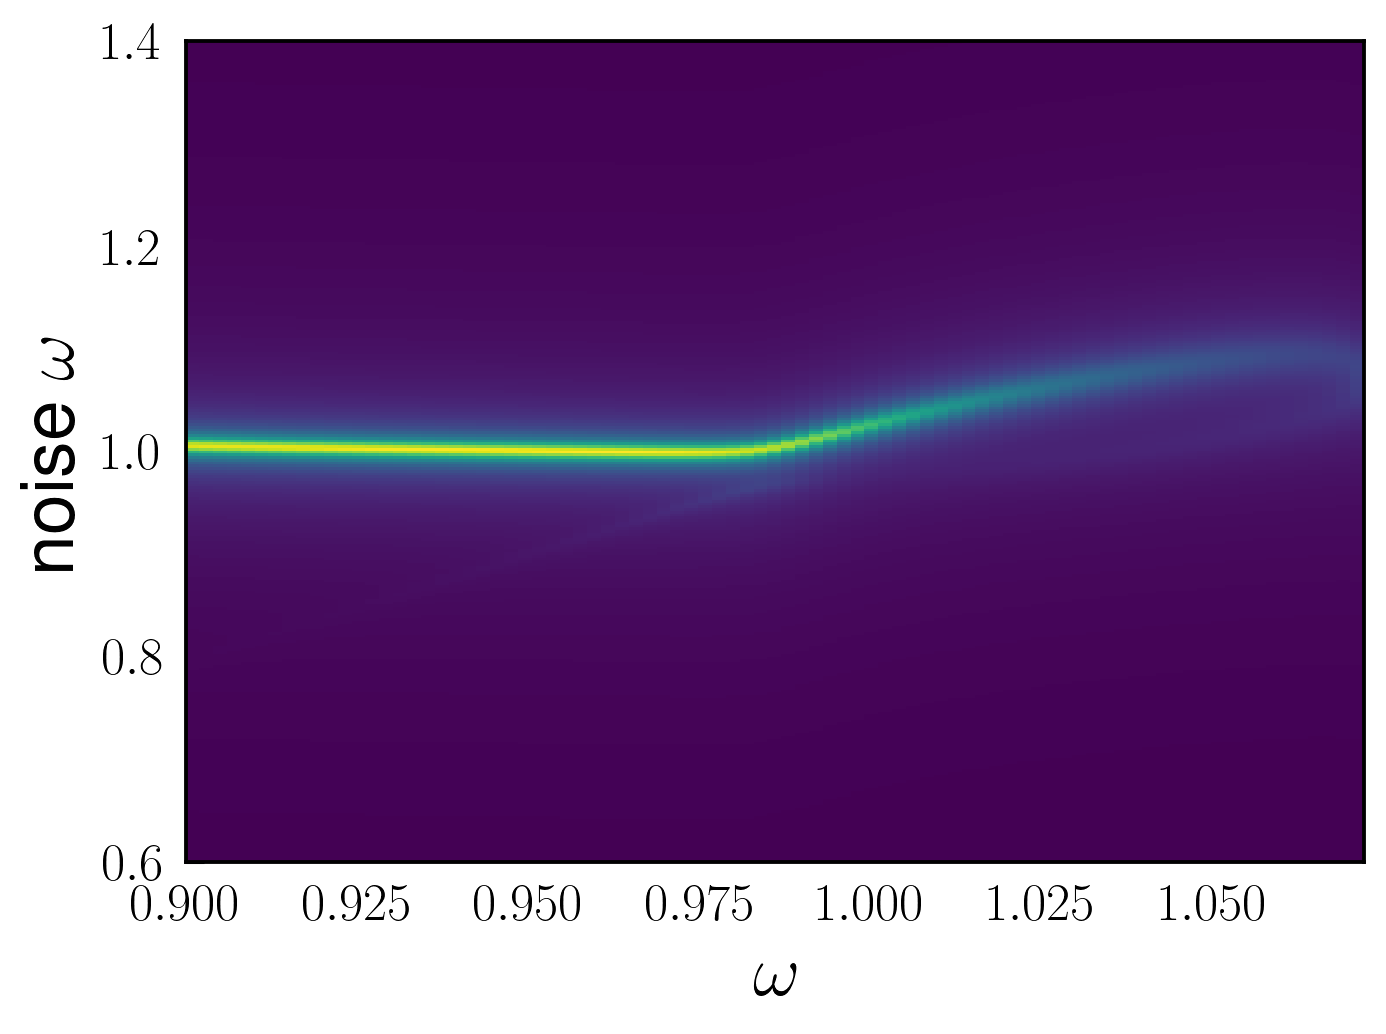

  3.774132 seconds (7.58 M allocations: 438.382 MiB, 3.78% gc time, 98.56% compilation time)


In [13]:
@time spectrum = HarmonicBalance.LinearResponse.plot_jacobian_spectrum(soln, x, branch=1, Ω_range=LinRange(0.6,1.4,300));
# @time HarmonicBalance.LinearResponse.plot_response(soln, LinRange(0.7,1.3,1000), branch=1, logscale=false);

# time-dependent solving

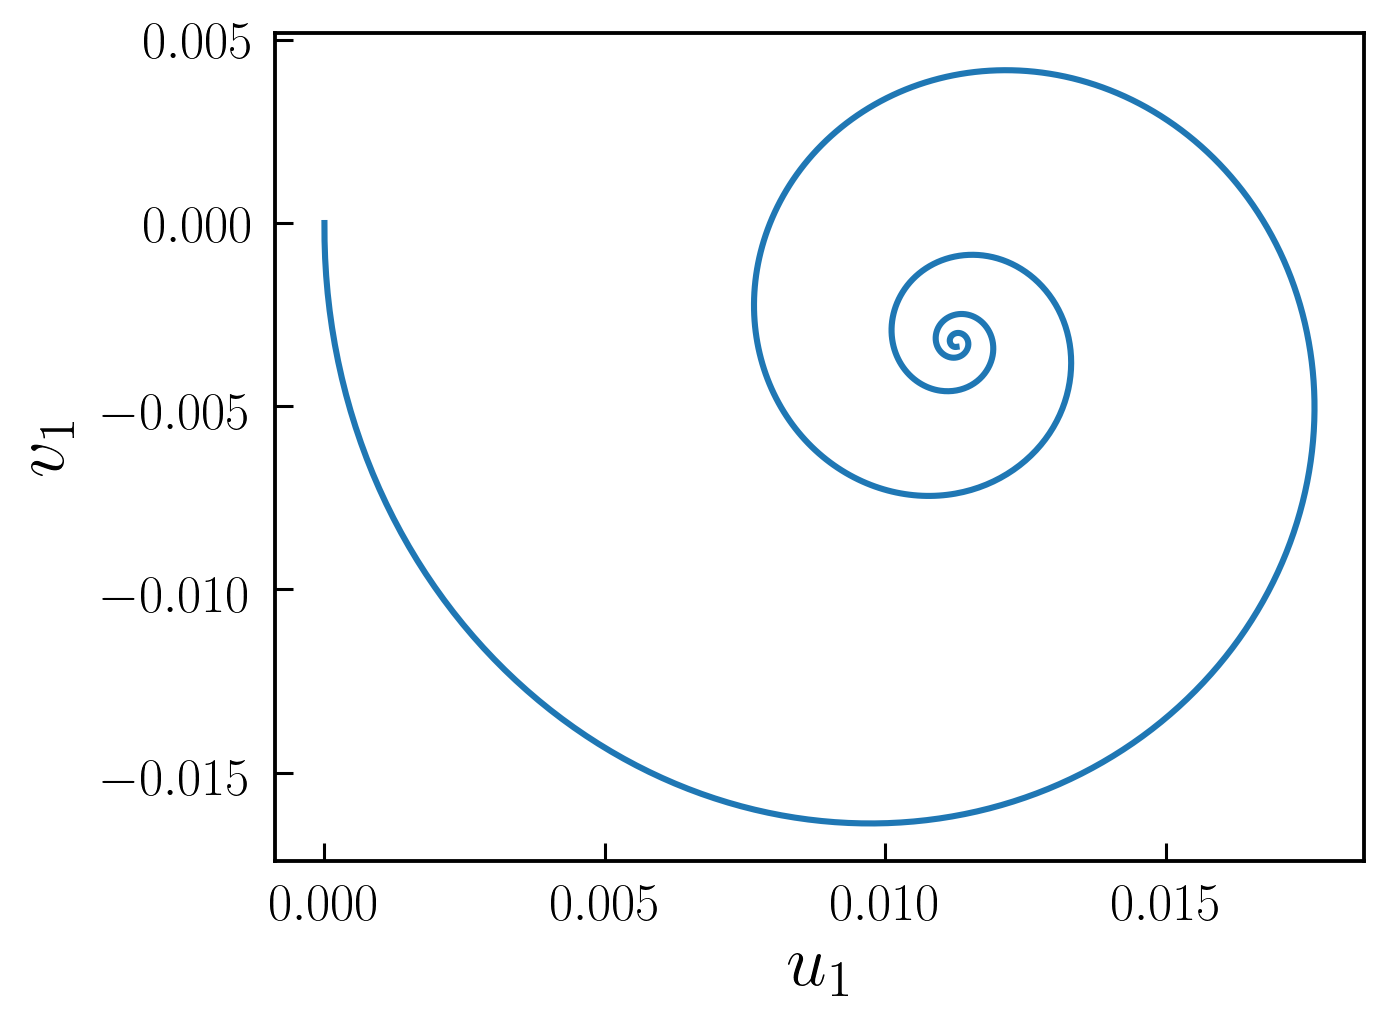

PyObject Text(89.61557290180275, 0.5, '$v_{1}$')

In [14]:
import HarmonicBalance.TimeEvolution: ODEProblem, DifferentialEquations.solve
using Latexify

x0 = [0.0, 0.0]

fixed = (Ω => 1.0,γ => 1E-2, λ => 5E-2, F => 1E-3,  α => 1., η=>0.3, θ => 0, ψ => 0, ω=>1.03)
ode_problem = ODEProblem(harmonic_eqs, fixed, x0 = x0, timespan = (0,1000));
time_evo= solve(ode_problem, saveat=1.); # saveat fixes output resolution (NOT the integration timestep)
HarmonicBalance.plot(getindex.(time_evo.u, 1), getindex.(time_evo.u,2))
HarmonicBalance.xlabel(latexify("u_1"), fontsize=24)
HarmonicBalance.ylabel(latexify("v_1"), fontsize=24)